Entropy and mutual information of Poisson random variables (all units are bits)

In [2]:
import scipy.stats as sts
import numpy as np

# a = 1000, b = 98000, c = 1000    k = 8,  d = 20000
# cbf
lamb = 1000 / 1250
lamb2 = 99000 / 1250
l = lamb * 24000 / 47999
l2 = lamb2 * 24000 / 47999
habc = (2 * sts.skellam.entropy(l, l) + sts.skellam.entropy(l2, l2)) / np.log(2) * 24000
hb_p_c = sts.skellam.entropy(l + l2, l + l2) / np.log(2) * 24000
habc, hb_p_c, habc - hb_p_c

(np.float64(213797.2579663855),
 np.float64(124993.68051172729),
 np.float64(88803.57745465823))

In [29]:
pmfb = np.empty(60)
for i in range(60):
    pmfb[i] = sts.skellam.pmf(i-30,l2, l2)
pmfa = np.empty(20)
for i in range(20):
    pmfa[i] = sts.skellam.pmf(i-10,l, l)
pmfb, pmfa

(array([0.00015786, 0.00022773, 0.00032463, 0.00045725, 0.00063638,
        0.00087507, 0.00118882, 0.00159556, 0.00211551, 0.00277081,
        0.00358485, 0.00458131, 0.00578291, 0.00720985, 0.00887798,
        0.01079683, 0.0129676 , 0.01538124, 0.0180169 , 0.02084079,
        0.02380588, 0.02685226, 0.02990854, 0.03289426, 0.03572306,
        0.03830673, 0.04055967, 0.04240358, 0.043772  , 0.04461425,
        0.0448986 , 0.04461425, 0.043772  , 0.04240358, 0.04055967,
        0.03830673, 0.03572306, 0.03289426, 0.02990854, 0.02685226,
        0.02380588, 0.02084079, 0.0180169 , 0.01538124, 0.0129676 ,
        0.01079683, 0.00887798, 0.00720985, 0.00578291, 0.00458131,
        0.00358485, 0.00277081, 0.00211551, 0.00159556, 0.00118882,
        0.00087507, 0.00063638, 0.00045725, 0.00032463, 0.00022773]),
 array([1.31764369e-11, 3.29882633e-10, 7.43538105e-09, 1.49034406e-07,
        2.61548314e-06, 3.93804642e-05, 4.94861030e-04, 4.98788767e-03,
        3.79032392e-02, 1.94500135e-01

In [30]:
probs = np.zeros((80, 80))
for i in range(60):
    for j in range(20):
        for k in range(20):
            probs[i+j][i+k] += pmfb[i] * pmfa[j] * pmfa[k]
probs = probs.flatten()        
pentropy = sts.entropy(probs) / np.log(2)
probs.sum(), pentropy

(0.9992009695847776, 7.572900896745241)

In [31]:
habc - hb_p_c, 24000 * pentropy - hb_p_c

(88803.57745465823, 56755.94101015851)

In [34]:
import scipy.stats as sts
import numpy as np

xs = np.linspace(50000, 250000, 1000)
n2 = [0, 100, 1000, 10000]
res = np.zeros((4,1000))
for i, n2i in enumerate(n2):
    for j, x in enumerate(xs):
        if n2i > 0:
            res[i,j] = sts.skellam(50000/x, n2i *5/x).entropy() / np.log(2) * x / 8000
        else:
            res[i,j] = sts.poisson(50000/x).entropy() / np.log(2) * x / 8000

for r in res:
    print(r[-1]/r[0])

2.0515046024763057
2.0651576057120535
2.1615351831906
2.628728999700727


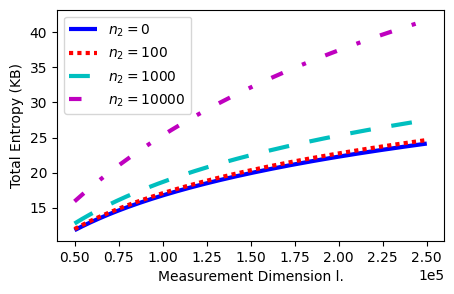

In [35]:
from oniakPlot import line_plot
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

data = [(xs, r) for r in res]
linenames = ["$n_2=0$", "$n_2=100$","$n_2=1000$","$n_2=10000$"]
line_plot.plot_result(data, linenames, "Measurement Dimension l.", "Total Entropy (KB)","", "/media/gtnetuser/Dell/CDMA/plot/entropy.pdf",
                      markers=[" "]*4, figsize=(5, 3))
mpl.pyplot.show()

In [6]:
sts.poisson(50).entropy() / np.log(2) * 100000 / 8000, sts.poisson(50).entropy() / np.log(2)

(np.float64(60.83243133235362), np.float64(4.86659450658829))

In [7]:
total = 100000
lamb = 25000 / total
lamb2 = 995000 * 5 / total
habc = (2 * sts.poisson.entropy(lamb) + sts.poisson.entropy(lamb2)) / np.log(2) * total
hb_p_c = sts.poisson.entropy(lamb + lamb2) / np.log(2) * total
habc, hb_p_c, habc - hb_p_c

(np.float64(664472.9386759459),
 np.float64(486659.45065882895),
 np.float64(177813.4880171169))

In [8]:
pmfb = np.empty(200)
for i in range(200):
    pmfb[i] = sts.poisson.pmf(i, lamb2)
pmfa = np.empty(20)
for i in range(20):
    pmfa[i] = sts.poisson.pmf(i, lamb)
probs = np.zeros((220, 220))

for i in range(200):
    for j in range(20):
        for k in range(20):
            probs[i+j][i+k] += pmfb[i] * pmfa[j] * pmfa[k]
probs = probs.flatten()        
pentropy = sts.entropy(probs) / np.log(2) * total
probs.sum(), pentropy, pmfa, pmfb

(np.float64(1.0000000000000018),
 np.float64(636191.6420296816),
 array([7.78800783e-01, 1.94700196e-01, 2.43375245e-02, 2.02812704e-03,
        1.26757940e-04, 6.33789700e-06, 2.64079042e-07, 9.43139434e-09,
        2.94731073e-10, 8.18697425e-12, 2.04674356e-13, 4.65168992e-15,
        9.69102066e-17, 1.86365782e-18, 3.32796039e-20, 5.54660065e-22,
        8.66656352e-24, 1.27449464e-25, 1.77013144e-27, 2.32912031e-29]),
 array([2.47656383e-22, 1.23209050e-20, 3.06482513e-19, 5.08250167e-18,
        6.32136145e-17, 6.28975465e-16, 5.21525489e-15, 3.70655616e-14,
        2.30501461e-13, 1.27416085e-12, 6.33895025e-12, 2.86693432e-11,
        1.18858319e-10, 4.54861642e-10, 1.61638334e-09, 5.36100473e-09,
        1.66693741e-08, 4.87824330e-08, 1.34829224e-07, 3.53039680e-07,
        8.78186204e-07, 2.08046494e-06, 4.70468775e-06, 1.01764442e-05,
        2.10949207e-05, 4.19788922e-05, 8.03249956e-05, 1.48006242e-04,
        2.62975376e-04, 4.51138792e-04, 7.48138497e-04, 1.20064162e-0

In [9]:
l = lamb
pentropy - hb_p_c, sts.skellam.entropy(l, l) / np.log(2) * total

(np.float64(149532.19137085264), np.float64(149824.64056160706))

In [13]:
(pentropy - hb_p_c) / 8000, (pentropy - hb_p_c)/ 100000

(np.float64(18.69152392135658), np.float64(1.4953219137085265))

In [11]:
sts.skellam.entropy(l, l) / np.log(2) * total / 8000, sts.skellam.entropy(l, l) / np.log(2) 

(np.float64(18.728080070200882), np.float64(1.4982464056160705))

In [14]:
18.728080070200882 / 18.69152392135658

1.0019557607500655

In [16]:
import math
math.log2(5) + 0.0669119562386038 + 0.0009163942939181965

2.389756445419884

In [17]:
2.389756445419884 / 1.4982464056160705

1.5950356606643947